# Introduction to Gaia data
### Prerequisites

$\texttt{numpy}$ and $\texttt{matplotlib}$.

Some familiarity with astronomy coordinate systems.

### New $\texttt{python}$ skills

$\texttt{pandas}$: a package for loading and manipulating tables of data (you can think of this as $\texttt{python}$'s version of excel or google sheets).                                                        
### Astro concepts

* The Gaia mission
* Magnitude and absolute magnitude scales
* Basic properties of stars: radius, temperature, color, etc.

In [1]:
# Let's start with importing our packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# We can beautify our plots by changing the matpltlib setting a little
plt.rcParams['font.size'] = 18
matplotlib.rcParams['axes.linewidth'] = 2
matplotlib.rcParams['font.family'] = "serif"

### What data set are we looking at?

(To do: picture of Gaia statalite and verys short overview of the mission)

# 1. Reading a table with $\texttt{pandas}$

In [2]:
# path to the table
path = 'data/gaia_100pc.csv'

# loading the table; this function assumes a 'comma separated file (aka csv)'
gaia = pd.read_csv(path)

# behind the scenes cleaning (likely want to distribute this shortened version)
gaia.loc[:,'radius'] = gaia.radius_gspphot
gaia.loc[:,'teff']   = gaia.teff_gspphot
gaia.loc[:,'gmag']   = gaia.phot_g_mean_mag
gaia.loc[:,'rmag']   = gaia.phot_rp_mean_mag
gaia.loc[:,'bmag']   = gaia.phot_bp_mean_mag
gaia.loc[:,'distance']   = gaia.distance_gspphot

gaia = gaia[['radius','teff','distance','gmag','rmag','bmag','ecl_lon','ecl_lat']]

FileNotFoundError: [Errno 2] No such file or directory: 'data/gaia_100pc.csv'

### What's in the table and how can we access it?

In [ ]:
# Let's print the first couple rows of data
gaia.head()

,radius,teff,distance,gmag,rmag,bmag,ecl_lon,ecl_lat
0,0.5023,3224.9536,13.3978,10.241307,9.135763,11.498909,279.484182,8.627836
1,0.4488,3508.4785,13.5867,10.019066,8.943984,11.186045,63.836273,38.387682
2,0.4814,3310.7295,13.5787,10.193903,9.102655,11.395733,63.836924,38.388986
3,0.6412,3473.9587,7.0383,7.756715,6.747296,8.790974,7.104283,71.152618
4,0.4892,3155.9285,8.5053,9.495382,8.347611,10.836117,249.618870,-15.836896


In [ ]:
# We can also print the last couple rows of data
gaia.tail()

,radius,teff,distance,gmag,rmag,bmag,ecl_lon,ecl_lat
501,0.1677,2878.0027,12.7056,13.652472,12.276646,15.956352,212.820918,21.919965
502,0.1887,2959.8933,12.2233,13.079426,11.746457,15.165963,271.133288,60.948970
503,0.8268,4914.2610,11.0935,6.129808,5.502101,6.585531,273.994073,61.861649
504,0.6636,3889.6328,3.4947,5.450645,4.556912,6.272253,336.994179,51.894370
505,0.6760,4353.7437,3.4904,4.766713,3.977203,5.439793,336.994324,51.903146


In [ ]:
# What columns are in the table?
gaia.columns

Index(['radius', 'teff', 'distance', 'gmag', 'rmag', 'bmag', 'ecl_lon',
       'ecl_lat'],
      dtype='object')

In [ ]:
# Let's access a single column
gaia['teff'] # this is the same as: gaia.teff

0      3224.9536
1      3508.4785
2      3310.7295
3      3473.9587
4      3155.9285
         ...    
501    2878.0027
502    2959.8933
503    4914.2610
504    3889.6328
505    4353.7437
Name: teff, Length: 506, dtype: float64

## 2. Playing with the Catalog

What we have now are a set of lists of numbers. Now we can spend a few minutes getting familiar with these values. Let us start by investigating the maximum and minimum values of magnitudes in this data set.

Should we also ask them to investigate any correlations? For instance if magnitude and reff or magnitude and teff are correlated? Could be useful later when we show what is correlated.

# 2. How can we visualize the data?

First, let's see where the stars are located relative to us. In the table, we have the distance to each star, as well as the ecliptic longitude and latitude. We can convert to Cartesian coordinates (x, y, z) and plot where the stars lie in the plane of the galaxy.

In [ ]:
lon = gaia.ecl_lon  # ecliptic longitude
lat = gaia.ecl_lat  # ecliptic latitude
r   = gaia.distance # distance from the Sun in pc

# conversion from cartesian to spherical coordinates
x = r * np.cos(lon) * np.cos(lat)
y = r * np.sin(lon) * np.cos(lat)
z = r * np.sin(lat)

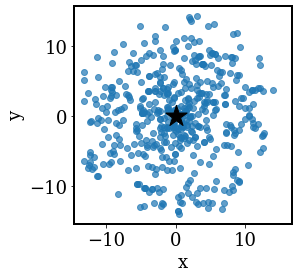

In [ ]:
# plot the positions of the stars
plt.scatter(x,y,alpha=0.7)
# alpha sets the transparancy of the points (1 is fully opaque and 0 is fully transparent)

# for context, let's place a star symbol at the position of the Sun
plt.scatter(0,0,marker='*',s=500,color='k')

# it's always good practice to label the axes (even if it's a bit arbitrary in our case)
_ = plt.xlabel('x')
_ = plt.ylabel('y')

# let's make the plot square, for easy interpretation
_ = plt.axis('square')

We now have an idea of where the stars are relative to us, but we can't tell much about them. Let's now set the size of the points on the scatter plot accordint to the size of the star.

In [ ]:
# size of the star in solar radii
s = gaia.radius

# if we pass these radii to matplotlib, we'll end up with some very small markers
# let's rescale the radii so that the largest star has a value of 100
s = (s-s.min()) / (s.max() - s.min())
s *= 100

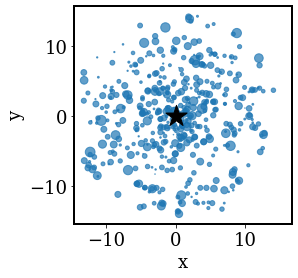

In [ ]:
# the s parameter sets the size of markers
# (it can either be a single number, or a list of numbers)
plt.scatter(x,y,s=s,alpha=0.7)

plt.scatter(0,0,marker='*',s=500,color='k')

_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.axis('square')

Our plot certainly is more interesting now. To pack even more information onto our plot, we can set the color of the points according to the temperature of the star.

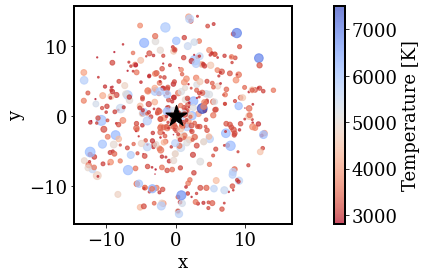

In [ ]:
# to set each point it's own color, we set 'c' equal to the stellar temperatures
# the color gradient is set by 'cmap'
sc = plt.scatter(x,y,s=s,c=gaia.teff,cmap='coolwarm_r',alpha=0.7)

# let's add a color bar, for easy interpretation
cb = plt.colorbar(sc)
cb.set_label('Temperature [K]')

plt.scatter(0,0,marker='*',s=500,color='k')

_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.axis('square')

From here to the end is "Gaia II" in my plan, because I would like them to do the basic stats notebooks first, and then come back to the line fitting.

# 3. What can we now learn about stars?

From our last plot, we can quickly notice a few things about our local region of space:
- Stars appear uniformly distributed in the galactic plane
- Stars span a wide range of temperatures and sizes
- The largest stars also appear to be the hottest stars

The last trend is one of the most important results in astrophysics. Let's take a closer look at a plot of stellar temperature vs. radius:

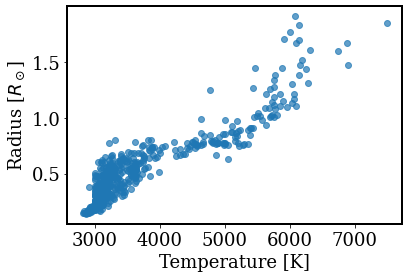

In [ ]:
plt.scatter(gaia.teff,gaia.radius,alpha=0.7)

_ = plt.xlabel('Temperature [K]')
_ = plt.ylabel('Radius [$R_\odot$]')

While radius and temperature are important properties of stars, they're not the whole story. For instance, we could also ask:
* How bright are the stars?
* What color are the stars?

Luckily, our table also includes the stars' magnitudes (how bright a star appears in the sky) in different color ranges. We can subtract two of these bands to define a "color." For example, let's consider the green band (g) and the red band (r). Below we plot the color $g-r$ against stellar temperature.

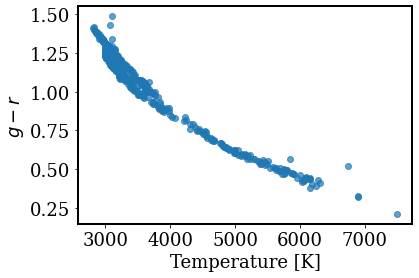

In [ ]:
g_r = gaia.gmag - gaia.rmag

plt.scatter(gaia.teff,g_r,alpha=0.7)

_ = plt.xlabel('Temperature [K]')
_ = plt.ylabel('$g-r$')

Wow! We've certainly found a very strong correlation. This trend between color and temperature is known as Wein's law. (insert blurb on Wein's law here and how color is a proxy for $\lambda_\mathrm{max}$)

$$ \lambda_\mathrm{max} \propto 1 / T $$

Let's see how closely the data match Wein's law. To do so, we'll need to solve for the free-parameters in the equation:
$$ g-r = b / T + c $$

(for now, I'm using scipy.optimize but this would work well using by hand fitting instead)

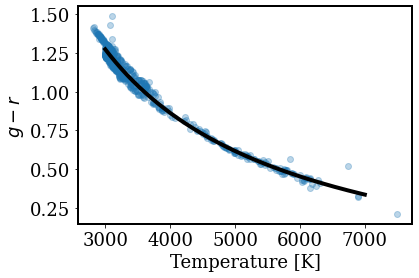

In [ ]:
from scipy.optimize import curve_fit

def weins_law(temp, b, c):
    return b / temp + c

# plot the observations
plt.scatter(gaia.teff, g_r, alpha=0.3)

# now let's fit a model
popt, pcov = curve_fit(weins_law, gaia.teff, g_r)

# now let's plot the model as a line
xp = np.linspace(3000,7000,1000)
plt.plot(xp,weins_law(xp,*popt),color='k',linewidth=4)

_ = plt.xlabel('Temperature [K]')
_ = plt.ylabel('$g-r$')

Above, we investigated stars' temperatures, radii, and colors. We've even seen how temperature and color are closely related via Wein's law.

Next, let's consider how "bright" the star's are. In astrophysics, we quantify "brightness" with the magnitude scale.
However, a star's magnitude is dependent on the star's distance from us.
To understand the star's *intrinsic* brightness we need to correct for distance. To do so, we must convert from magntides to **absolute magnitudes** with the formula:
$$ M = m - 5 \log_{10} [d/\mathrm{pc}] + 5, $$
where $m$ is the magnitude and $M$ is the absolute magnitude.

Absolute magnitude is certainly useful, but it's often more convenient to use luminosity (the amount of energy emitted by the star per unit time). Absolute magnitude and luminosity are related via:
$$  M \propto -2.5 \log_{10} L. $$

In [ ]:
M = gaia.gmag - 5 * np.log10(gaia.distance) + 5

How does absolute magnitude depend on the other properties of stars (such as temperature and radius)?

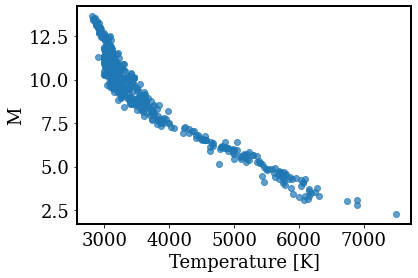

In [ ]:
# temperature?
plt.scatter(gaia.teff, M, alpha=0.7)

_ = plt.xlabel('Temperature [K]')
_ = plt.ylabel('M')

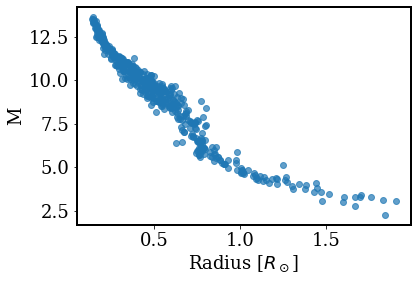

In [ ]:
# stellar radius?
plt.scatter(gaia.radius, M, alpha=0.7)

_ = plt.xlabel('Radius [$R_\odot$]')
_ = plt.ylabel('M')

The two plots above show that absolute magnitude (aka, a star's intrinsic brightness) is closely tied to stellar size and temperature. We've stumbled onto another key result: the Stefan–Boltzmann law
$$ L \propto R^3 T^4, $$
since $ \log_{10}L \propto M $ it follows that
$$ M \propto \log_{10} [R^3 T^4], $$

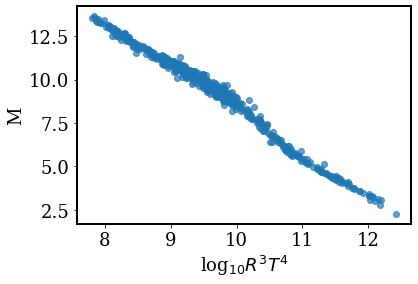

In [ ]:
plt.scatter( np.log10(gaia.radius**3 * gaia.teff**3), M, alpha=0.7)

_ = plt.xlabel('log$_{10} R^3 T^4$')
_ = plt.ylabel('M')